In [7]:
#Import relevant libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
from scipy import stats

Matplotlib is building the font cache; this may take a moment.


In [10]:
#Importing the Benin data,.
print(os.getcwd())
os.chdir(r'C:\Users\Dagi\Documents\KAIM\week 0\solar-farm-data_analysis') 
print(os.getcwd())
df = pd.read_csv(r'data\benin-malanville.csv')
# Display the first few rows of the dataset 
df.head()

C:\Users\Dagi\Documents\KAIM\week 0\solar-farm-data_analysis
C:\Users\Dagi\Documents\KAIM\week 0\solar-farm-data_analysis


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [11]:
# Understand the shape 
df.shape

(525600, 19)

In [12]:
# Overview of the varbiables
df.head

<bound method NDFrame.head of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        W

In [13]:
#columns in the dataset.
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [14]:
#  data types of columns.
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [15]:
# A general description of the dataset.
df
.describe

<bound method NDFrame.describe of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

     

In [22]:
# Subsetting the columns that i consider irrelevant to my analysis.
# Also re-assign the data_frame variable

df = df[['Timestamp', 'GHI', 'DNI', 'DHI',
            'ModA', 'ModB', 
            'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev','Cleaning','WD',
            #'WDstdev', 'BP', 'Comments',
            'Precipitation','TModA', 'TModB',]].copy()

In [23]:
# Checking the number of coulmns included.
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'Cleaning', 'WD', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')

In [24]:
# overview of the data types.
df.dtypes

Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
Cleaning                  int64
WD                      float64
Precipitation           float64
TModA                   float64
TModB                   float64
dtype: object

In [19]:
# The time stamp shouldn't be an object so i am going to convert it to a datetime coulmn.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [20]:
# look for missing values.
df.isna().sum()
#no missing values.

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
Cleaning         0
WD               0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [27]:
#check for duplicated values. 
df.loc[df.duplicated()]
#values are duplicated.

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,Cleaning,WD,Precipitation,TModA,TModB


In [28]:
#a summary statistics
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,Cleaning,WD,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,0.000923,153.435172,0.001905,35.246026,32.471736
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,8.100000
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,0.000000,59.000000,0.000000,24.200000,23.600000
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,0.000000,181.000000,0.000000,30.000000,28.900000
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,0.000000,235.100000,0.000000,46.900000,41.500000
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,1.000000,360.000000,2.500000,81.000000,72.500000
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,0.030363,102.332842,0.037115,14.807258,12.348743


In [30]:
#check for the existence of outliers using Z-score method 
from scipy.stats import zscore  # Import the zscore function
# Ensure columns except 'Timestamp' are numeric
benin_df_numeric = df.drop('Timestamp', axis=1).apply(pd.to_numeric, errors='coerce')

# Set the Z-score threshold for identifying outliers
threshold = 3

# Iterate over each column in the DataFrame
for column in benin_df_numeric.columns:
    # Calculate Z-scores for the column
    z_scores = zscore(benin_df_numeric[column], nan_policy='omit')

    # Identify outliers where Z-scores are greater than the threshold
    outliers = np.abs(z_scores) > threshold
    
    # Calculate the median of the non-outlier values in the column
    column_median = benin_df_numeric.loc[~outliers, column].median()

    # Replace outliers with the column median
    benin_df_numeric.loc[outliers, column] = column_median

    print(f"Number of outliers in {column}: {outliers.sum()}")

# Update the original DataFrame with the modified values
df.update(benin_df_numeric)

# Recheck if there are any remaining outliers (optional step)
remaining_outliers = (np.abs(zscore(benin_df_numeric, nan_policy='omit')) > threshold).any(axis=1)
print(f"Number of remaining outliers after replacement: {remaining_outliers.sum()}")

Number of outliers in GHI: 1
Number of outliers in DNI: 0
Number of outliers in DHI: 1932
Number of outliers in ModA: 0
Number of outliers in ModB: 0
Number of outliers in Tamb: 0
Number of outliers in RH: 0
Number of outliers in WS: 1133
Number of outliers in WSgust: 828
Number of outliers in WSstdev: 0
Number of outliers in Cleaning: 0
Number of outliers in WD: 0
Number of outliers in Precipitation: 2387
Number of outliers in TModA: 0
Number of outliers in TModB: 11
Number of remaining outliers after replacement: 1519


In [31]:
#there are some outliers still left in some columns so  try to remove these remaining outliers.
# Selected columns for outlier removal
selected_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WD']

# Ensure columns except 'Timestamp' are numeric
benin_df_numeric = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Set the Z-score threshold for identifying outliers
threshold = 3

# Iterate over each selected column in the DataFrame
for column in selected_columns:
    # Calculate Z-scores for the column
    z_scores = zscore(benin_df_numeric[column], nan_policy='omit')

    # Identify outliers where Z-scores are greater than the threshold
    outliers = np.abs(z_scores) > threshold
    
    # Calculate the median of the non-outlier values in the column
    column_median = benin_df_numeric.loc[~outliers, column].median()

    # Replace outliers with the column median
    benin_df_numeric.loc[outliers, column] = column_median

    print(f"Number of outliers in {column}: {outliers.sum()}")

# Update the original DataFrame with the modified values
df.update(benin_df_numeric)

# Recheck if there are any remaining outliers (optional step)
remaining_outliers = (np.abs(zscore(benin_df_numeric, nan_policy='omit')) > threshold).any(axis=1)
print(f"Number of remaining outliers after replacement: {remaining_outliers.sum()}")

Number of outliers in GHI: 0
Number of outliers in DNI: 0
Number of outliers in DHI: 1030
Number of outliers in ModA: 0
Number of outliers in ModB: 0
Number of outliers in WD: 0
Number of remaining outliers after replacement: 607


In [33]:
#change on the values after removing the outliers
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,Cleaning,WD,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.0,525600.000000,525600.0,525600.000000,525600.000000
mean,2022-02-07 12:00:30.000000512,240.340468,167.187516,107.662768,236.524528,228.737160,28.179683,54.487969,2.071892,2.743631,0.462676,0.0,153.435172,0.0,35.245072,32.463127
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,9.000000,8.100000
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,0.0,59.000000,0.0,24.200000,23.600000
50%,2022-02-07 12:00:30,1.800000,-0.100000,0.500000,4.500000,4.300000,28.000000,55.100000,1.900000,2.400000,0.500000,0.0,181.000000,0.0,30.000000,28.900000
75%,2022-05-09 18:00:15,482.900000,314.200000,206.100000,463.600000,447.600000,32.300000,80.100000,3.000000,3.900000,0.600000,0.0,235.100000,0.0,46.900000,41.500000
max,2022-08-09 00:00:00,1232.000000,952.300000,559.900000,1215.000000,1177.000000,43.800000,100.000000,6.600000,8.400000,1.200000,0.0,360.000000,0.0,79.600000,69.400000
std,NaN,330.865639,261.710501,149.098283,326.815176,316.357415,5.924297,28.073069,1.506107,1.898486,0.249952,0.0,102.332842,0.0,14.805982,12.336751


In [ ]:
Analysis
Time series analysis
After removing the outliers and being done with the data cleaning and basic understanding stages let's proceed to the analysis part. We start by conducting a time series analysis to show trends by days and months. We proceed with the time series analysis by using line graphs of the key metircs(variables mentioned).

In [34]:
# Overview of the relevant columns
print(df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'Cleaning', 'WD', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')


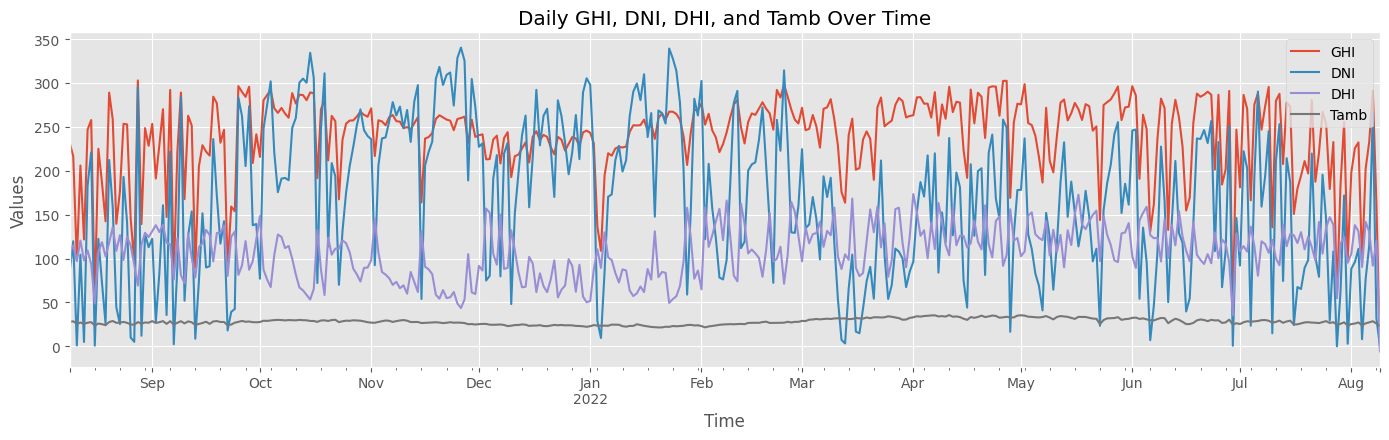

In [42]:


# Assuming the DataFrame df is already loaded and 'Timestamp' is set as the index

# Resample the data by day or month to observe patterns
df_daily = df.resample('D').mean()
df_monthly = df.resample('ME').mean()  # Use 'ME' for end of month resampling

# Plotting GHI, DNI, DHI, and Tamb over time (using daily resampled data)
plt.figure(figsize=(14, 8))

# Line plot for GHI, DNI, DHI, and Tamb
plt.subplot(2, 1, 1)
df_daily[['GHI', 'DNI', 'DHI', 'Tamb']].plot(ax=plt.gca(), linewidth=1.5)
plt.title('Daily GHI, DNI, DHI, and Tamb Over Time')
plt.ylabel('Values')
plt.xlabel('Time')
plt.grid(True)

plt.tight_layout()
plt.show()


evaluate the impact of cleaning on the two sensors(ModA and ModB) by using the cleaning column.

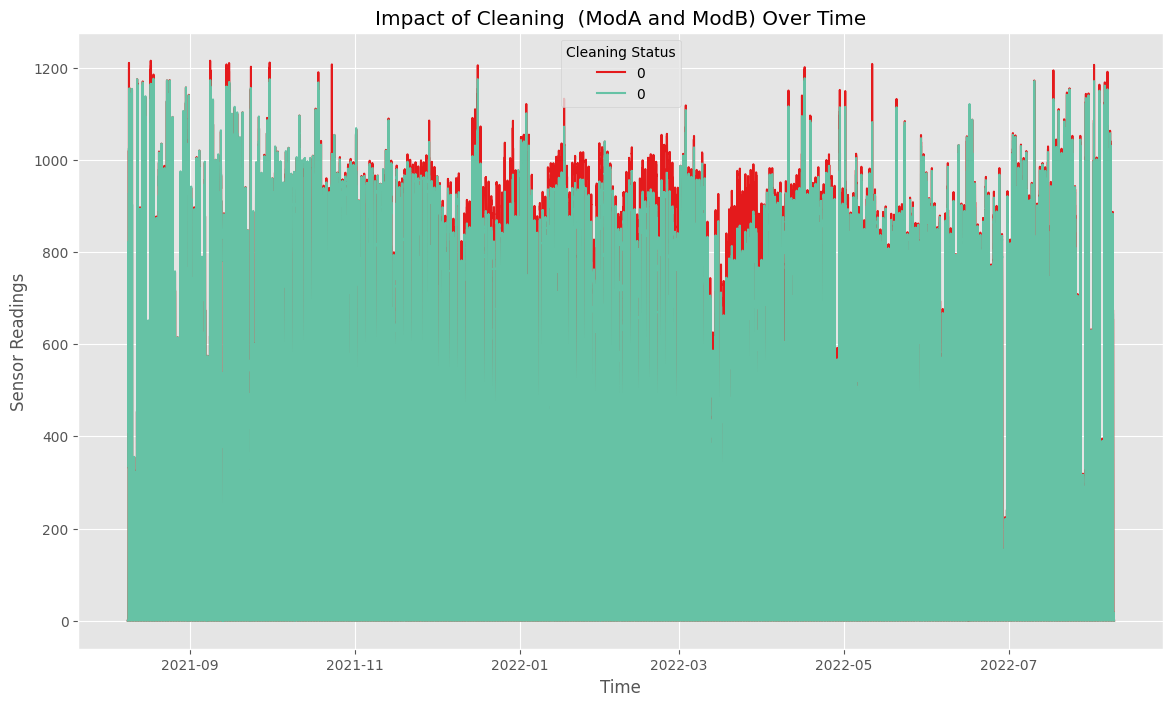

In [45]:
# Check if 'Cleaning' column exists
if 'Cleaning' not in df.columns:
    raise KeyError("The 'Cleaning' column is not present in the DataFrame.")

# Check if 'Timestamp' column is set as index; if not, set it
if df.index.name != 'Timestamp':
    df.set_index('Timestamp', inplace=True)

# Define the figure size
plt.figure(figsize=(14, 8))

# Plot ModA and ModB sensor readings over time, colored by the 'Cleaning' column
sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning', palette='Set1', linewidth=1.5)
sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning', palette='Set2', linewidth=1.5)

# Add titles and labels
plt.title('Impact of Cleaning  (ModA and ModB) Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.legend(title='Cleaning Status')
plt.grid(True)

# Show the plot
plt.show()